<h1> Machine Learning Notebook

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [4]:
filepath = '/Users/efkanturedi/Corteze/untitled folder/nutri_clean_prod.csv'
data = pd.read_csv(filepath)

/Users/efkanturedi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000000100,moutarde au moût de raisin,courte paille,d,Fat and sauces,260.0,7.0,1.8,15.1,3.57,0.0,5.1,0.58,18.0
1,0000000000949,Salade de carottes râpées,NaN,b,Composite foods,32.0,0.3,0.1,5.3,3.57,1.6,0.9,0.42,1.0
2,0000000001281,Tarte noix de coco,"Crous Resto',Crous",d,Sugary snacks,260.0,7.0,1.8,15.1,3.57,1.6,4.6,0.10,14.0
3,0000000001885,Compote de poire,Crous,a,Fruits and vegetables,157.0,0.0,0.0,15.1,3.57,1.6,0.6,0.00,-2.0
4,0000000002257,Salade de macedoine de légumes,NaN,b,Composite foods,143.0,7.0,1.0,3.9,1.00,1.6,1.9,0.27,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731716,9999991042742,Mousse au chocolat noir,NaN,d,unknown,260.0,7.0,1.8,15.1,3.57,1.6,6.0,0.19,17.0
731717,9999991149090,Riz parfumé,King Elephant,b,Cereals and potatoes,260.0,0.5,0.0,15.1,0.00,1.6,6.0,0.00,0.0
731718,9999999004360,Minis beignets,NaN,d,unknown,260.0,7.0,1.8,15.1,3.57,1.6,6.0,0.58,15.0
731719,9999999175305,Erdbeerkuchen 1019g tiefgefroren,Coppenrath & Wiese,d,Sugary snacks,260.0,7.0,1.8,15.1,3.57,1.6,2.6,0.28,12.0


In [6]:
# Revove comment if you want to use only a sample of the dataset

#data = data.sample(n=200000,random_state=42)

In [7]:
# We add the code to use it as primary key
X_cols = [
  'energy-kcal_100g',
  #'fat_100g',
  'saturated-fat_100g',
  #'carbohydrates_100g',
  'sugars_100g',
  'fiber_100g',
  'proteins_100g',
  'salt_100g',
]

In [8]:
X = data[X_cols].reset_index(drop=True)
y = data[[
  'nutrition-score-fr_100g',
  'nutriscore_grade'
]].reset_index(drop=True)

In [9]:
y

,nutrition-score-fr_100g,nutriscore_grade
0,18.0,d
1,1.0,b
2,14.0,d
3,-2.0,a
4,1.0,b
...,...,...
731716,17.0,d
731717,0.0,b
731718,15.0,d
731719,12.0,d


<h3> Some Plots

/Users/efkanturedi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


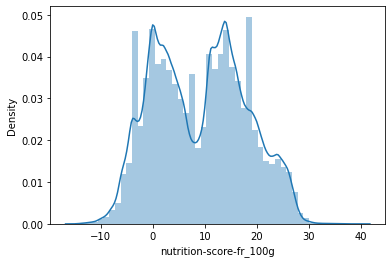

In [10]:
sns.distplot(y['nutrition-score-fr_100g']);

<h3> Standardising & Normalizing the data

In [11]:
# Creating Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

# Creating Validation set
# X_train, y_train, X_val, y_val = train_test_split(X_train, y_train, train_size=0.9)

In [12]:
X_test

,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
594509,65.0,1.80,3.57,1.6,3.4,0.100000
216177,260.0,1.56,3.57,1.6,6.0,0.000000
281298,260.0,1.80,3.57,1.6,4.1,0.300000
332714,260.0,0.01,3.57,1.6,0.5,0.010000
522024,108.0,0.30,3.20,1.6,1.6,0.580000
...,...,...,...,...,...,...
364339,260.0,0.90,3.57,1.6,6.0,0.000000
335566,250.0,1.80,3.57,1.6,2.3,0.120000
731072,260.0,1.80,3.57,1.6,6.0,0.000348
548008,260.0,0.20,1.40,1.6,5.9,0.457200


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3> Running the models

In [14]:
import math
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

<h5> Dummy regressor

In [15]:
results = pd.DataFrame(columns=['Model','RMSE','R2','Adj R2'])
n = X_test.shape[0]
p = y_test.shape[1]-1

In [16]:
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train,y_train['nutrition-score-fr_100g'])

DummyRegressor()

In [17]:
dummy_rmse = math.sqrt(mean_squared_error(dummy_reg.predict(X_test), y_test['nutrition-score-fr_100g']))
dummy_r2 = r2_score(dummy_reg.predict(X_test), y_test['nutrition-score-fr_100g'])

In [18]:
results = results.append({
  'Model':'DummyRegressor',
  'RMSE':dummy_rmse,
  'R2': dummy_r2,
  'Adj R2':1-((1-dummy_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859176,-2.487289e+31,-2.487306e+31


<h5> Linear Model

In [19]:
elastic_net = ElasticNetCV()
elastic_net.fit(X_train,y_train['nutrition-score-fr_100g'])

ElasticNetCV()

In [20]:
elastic_net_rmse = math.sqrt(mean_squared_error(elastic_net.predict(X_test), y_test['nutrition-score-fr_100g']))
elastic_net_r2 = r2_score(elastic_net.predict(X_test), y_test['nutrition-score-fr_100g'])

In [21]:
results = results.append({
  'Model':'Elastic Net',
  'RMSE':elastic_net_rmse,
  'R2':elastic_net_r2,
  'Adj R2' : 1-((1-elastic_net_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859176,-2.487289e+31,-2.487306e+31
1,Elastic Net,6.392632,-1.040048e-01,-1.040124e-01


<h5> Random Forest

In [22]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train,y_train['nutrition-score-fr_100g'])

RandomForestRegressor(n_jobs=-1)

In [23]:
rfr_rmse = math.sqrt(mean_squared_error(rfr.predict(X_test), y_test['nutrition-score-fr_100g']))
rfr_r2 = r2_score(rfr.predict(X_test), y_test['nutrition-score-fr_100g'])

In [24]:
results = results.append({
  'Model':'Random Forest',
  'RMSE':rfr_rmse,
  'R2':rfr_r2,
  'Adj R2': 1-((1-rfr_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859176,-2.487289e+31,-2.487306e+31
1,Elastic Net,6.392632,-1.040048e-01,-1.040124e-01
2,Random Forest,4.747805,6.200919e-01,6.200893e-01


<h5> XGBoost

In [25]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train['nutrition-score-fr_100g'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [26]:
xgb_rmse = math.sqrt(mean_squared_error(xgb.predict(X_test), y_test['nutrition-score-fr_100g']))
xgb_r2 = r2_score(xgb.predict(X_test), y_test['nutrition-score-fr_100g'])

In [27]:
results = results.append({
  'Model':'XGBoost',
  'RMSE':xgb_rmse,
  'R2':xgb_r2,
  'Adj R2':1-((1-xgb_r2)*(n-1)/(n-p-1))
},ignore_index=True)

results

,Model,RMSE,R2,Adj R2
0,DummyRegressor,8.859176,-2.487289e+31,-2.487306e+31
1,Elastic Net,6.392632,-1.040048e-01,-1.040124e-01
2,Random Forest,4.747805,6.200919e-01,6.200893e-01
3,XGBoost,4.838125,5.695203e-01,5.695174e-01


<h3>GridSearchCV on Random Forest and XGBoost:

In [28]:
#xgb_parameters = {
#  'n_estimators':[2000,3000],
#  'learning_rate': [0.2,0.3]
#}

In [29]:
#xgb_grid = GridSearchCV(estimator = XGBRegressor(), 
#                      scoring='neg_root_mean_squared_error',
#                      param_grid = xgb_parameters,
#                      cv=3,
#                      verbose=False
#)
#
#xgb_grid.fit(X_train, y_train['nutrition-score-fr_100g'])

In [30]:
#xgb_best_params_ = xgb_grid.best_params_
#xgb_best_params_

In [31]:
#xgb_opt = xgb_grid.best_estimator_

In [32]:
#xgb_opt_rmse = math.sqrt(mean_squared_error(xgb_opt.predict(X_test), y_test['nutrition-score-fr_100g']))
#xgb_opt_r2 = r2_score(xgb_opt.predict(X_test), y_test['nutrition-score-fr_100g'])

#results = results.append({
#  'Model':'XGBoost Hypt',
#  'RMSE':xgb_opt_rmse,
#  'R2':xgb_opt_r2,
#  'Adj R2':1-((1-xgb_opt_r2)*(n-1)/(n-p-1))
#},ignore_index=True)

#results

In [33]:
#rfr_parameters = {
#  'n_estimators': [1000],
#  #'n_estimators': [200,500,1000],
#}

In [34]:
#rfr_grid = GridSearchCV(estimator = RandomForestRegressor(n_jobs=-1), 
#                      scoring='neg_root_mean_squared_error',
#                      param_grid = rfr_parameters,
#                      cv=3,
#                      verbose=False
#                     )
#
#rfr_grid.fit(X_train, y_train['nutrition-score-fr_100g'])

In [35]:
#rfr_best_params_ = rfr_grid.best_params_
#rfr_best_params_

In [36]:
#rfr_opt = rfr_grid.best_estimator_

In [37]:
#rfr_opt_rmse = math.sqrt(mean_squared_error(rfr_opt.predict(X_test), y_test['nutrition-score-fr_100g']))
#rfr_opt_r2 = r2_score(rfr_opt.predict(X_test), y_test['nutrition-score-fr_100g'])

#results = results.append({
#  'Model':'Random Forest Hypt',
#  'RMSE':rfr_opt_rmse,
#  'R2':rfr_opt_r2,
#  'Adj R2':1-((1-rfr_opt_r2)*(n-1)/(n-p-1))
#},ignore_index=True)

#results

In [38]:
#min(rfr_opt_rmse,xgb_opt_rmse)

In [39]:
if rfr_rmse < xgb_rmse:
  rgr_opt = rfr
else:
  rgr_opt = xgb

We assume to pick Random Forest as our main model. Lets transform our numbers into letters, and then use recall and precision to evaluate our model performance.

In [40]:
y_pred = rgr_opt.predict(X_test)

In [41]:
y_test

,nutrition-score-fr_100g,nutriscore_grade
594509,0.0,b
216177,10.0,c
281298,26.0,e
332714,14.0,d
522024,6.0,c
...,...,...
364339,-7.0,a
335566,13.0,d
731072,0.0,a
548008,-9.0,a


In [42]:
d = {'y_pred': y_pred, 'y_true': y_test['nutrition-score-fr_100g'], 'y_original_grade':y_test['nutriscore_grade']}
df = pd.DataFrame(data = d)
df

,y_pred,y_true,y_original_grade
594509,2.454631,0.0,b
216177,8.670802,10.0,c
281298,21.869849,26.0,e
332714,9.403704,14.0,d
522024,3.710000,6.0,c
...,...,...,...
364339,1.076972,-7.0,a
335566,14.060000,13.0,d
731072,0.340000,0.0,a
548008,-4.633333,-9.0,a


In [43]:
df['y_pred_grade'] = df.y_pred.apply(lambda x: grader_food(x))
df['y_true_grade'] = df.y_true.apply(lambda x: grader_food(x))

In [44]:
df

,y_pred,y_true,y_original_grade,y_pred_grade,y_true_grade
594509,2.454631,0.0,b,c,b
216177,8.670802,10.0,c,c,c
281298,21.869849,26.0,e,e,e
332714,9.403704,14.0,d,c,d
522024,3.710000,6.0,c,c,c
...,...,...,...,...,...
364339,1.076972,-7.0,a,b,a
335566,14.060000,13.0,d,d,d
731072,0.340000,0.0,a,b,b
548008,-4.633333,-9.0,a,a,a


In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
labels = ['a','b','c','d','e']

In [47]:
cf_matrix = confusion_matrix(df['y_original_grade'],df['y_pred_grade'],labels=labels)

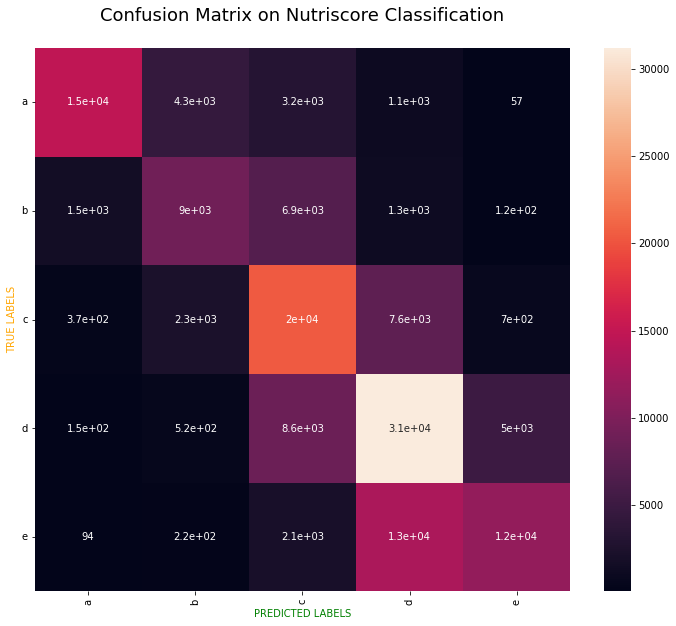

In [48]:
fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel("PREDICTED LABELS", color="g")
ax.set_ylabel("TRUE LABELS", color="orange")
ax.xaxis.set_ticklabels(labels, 
                        rotation='vertical')
ax.yaxis.set_ticklabels(labels,
                        rotation='horizontal')
plt.title("Confusion Matrix on Nutriscore Classification\n",
          fontsize=18)
plt.show()

In [49]:
print(classification_report(df['y_original_grade'],df['y_pred_grade'],target_names=labels))

              precision    recall  f1-score   support

           a       0.87      0.63      0.73     23320
           b       0.55      0.48      0.51     18786
           c       0.50      0.65      0.56     31497
           d       0.57      0.69      0.62     45472
           e       0.66      0.42      0.52     27270

    accuracy                           0.59    146345
   macro avg       0.63      0.57      0.59    146345
weighted avg       0.62      0.59      0.59    146345



<h3> Exporting the pipeline of model

In [50]:
from sklearn.pipeline import Pipeline
import pickle

In [51]:
pipeline = Pipeline([
    ('standard_scaler', scaler), 
    ('model', rgr_opt)
])

In [52]:
with open('./model.pickle', 'wb') as model_file:
  pickle.dump(pipeline, model_file)